In [2]:
import os
import torch
import numpy as np
import scanpy as sc
import rootutils
from torch_geometric.data import Data
from sklearn.neighbors import NearestNeighbors
rootutils.setup_root(os.getcwd(), indicator=".project-root", pythonpath=True)
from src.data.spatial_omics_datamodule import SpatialOmicsDataModule
from src.utils.preprocess_helpers import (
    read_samples_into_dict,
    save_sample,
    preprocess_sample,
    euclid_dist,
    create_graph,
    SpatialOmicsDataset
)

In [3]:
def print_sample(sample_name, adata):
    """
    Visualizes spatial embeddings of a single AnnData object and prints its details.

    Parameters:
    ----------
    sample_name : str
        The name of the sample.
    adata : AnnData
        The AnnData object containing spatial and gene expression data.

    Behavior:
    --------
    - Prints the sample name and the corresponding AnnData object.
    - Determines the color key (`domain`, `region`, or `layer`) based on the sample name prefix.
    - Plots the spatial embedding of the AnnData object using `scanpy.pl.embedding`.

    Notes:
    -----
    - The `domain` is used for samples starting with "MERFISH".
    - The `region` is used for samples starting with "STARmap".
    - The `layer` is used for samples starting with "BaristaSeq".
    - The spatial embedding is visualized using the `spatial` basis.
    """
    if sample_name.startswith("MERFISH"):
        domain = "domain"
    elif sample_name.startswith("STARmap"):
        domain = "region"
    elif sample_name.startswith("BaristaSeq"):
        domain = "layer"
    
    print(f"Sample: {sample_name}")
    print(adata)
    sc.pl.embedding(adata, basis="spatial", color=domain)

In [4]:
raw_file_paths = [
    "../data/domain/raw/MERFISH_small1.h5ad",
    "../data/domain/raw/MERFISH_small2.h5ad",
    "../data/domain/raw/MERFISH_small3.h5ad",
    "../data/domain/raw/MERFISH_small4.h5ad",
    "../data/domain/raw/MERFISH_small5.h5ad",
    "../data/domain/raw/STARmap1.h5ad",
    "../data/domain/raw/STARmap2.h5ad",
    "../data/domain/raw/STARmap3.h5ad",
    "../data/domain/raw/STARmap4.h5ad",
    "../data/domain/raw/BaristaSeq1.h5ad",
    "../data/domain/raw/BaristaSeq2.h5ad",
    "../data/domain/raw/BaristaSeq3.h5ad"
]

processed_file_paths = [
    "../data/domain/processed/MERFISH_small1.h5ad",
    "../data/domain/processed/MERFISH_small2.h5ad",
    "../data/domain/processed/MERFISH_small3.h5ad",
    "../data/domain/processed/MERFISH_small4.h5ad",
    "../data/domain/processed/MERFISH_small5.h5ad",
    "../data/domain/processed/STARmap1.h5ad",
    "../data/domain/processed/STARmap2.h5ad",
    "../data/domain/processed/STARmap3.h5ad",
    "../data/domain/processed/STARmap4.h5ad",
    "../data/domain/processed/BaristaSeq1.h5ad",
    "../data/domain/processed/BaristaSeq2.h5ad",
    "../data/domain/processed/BaristaSeq3.h5ad"
]


raw_samples = read_samples_into_dict(raw_file_paths)
print(len(raw_samples))

processed_samples = read_samples_into_dict(processed_file_paths)
print(len(processed_samples))

graphs = torch.load("../data/domain/processed/dataset.pt", weights_only=False)
print(len(graphs))

12
12
12


In [5]:
for g in graphs:
    print(g)

Data(x=[1512, 50], edge_index=[2, 37034], edge_weight=[37034], sample_name='BaristaSeq1')
Data(x=[5488, 50], edge_index=[2, 131968], edge_weight=[131968], sample_name='MERFISH_small1')
Data(x=[1088, 50], edge_index=[2, 26720], edge_weight=[26720], sample_name='STARmap4')
Data(x=[1049, 50], edge_index=[2, 25768], edge_weight=[25768], sample_name='STARmap2')
Data(x=[1053, 50], edge_index=[2, 26016], edge_weight=[26016], sample_name='STARmap3')
Data(x=[5543, 50], edge_index=[2, 133630], edge_weight=[133630], sample_name='MERFISH_small5')
Data(x=[5803, 50], edge_index=[2, 139722], edge_weight=[139722], sample_name='MERFISH_small4')
Data(x=[1207, 50], edge_index=[2, 29718], edge_weight=[29718], sample_name='STARmap1')
Data(x=[1627, 50], edge_index=[2, 39640], edge_weight=[39640], sample_name='BaristaSeq3')
Data(x=[5926, 50], edge_index=[2, 142476], edge_weight=[142476], sample_name='MERFISH_small3')
Data(x=[5557, 50], edge_index=[2, 134292], edge_weight=[134292], sample_name='MERFISH_small2

Sample: MERFISH_small1
AnnData object with n_obs × n_vars = 5488 × 155
    obs: 'cell_class', 'neuron_class', 'domain', 'Region'
    uns: 'domain_colors'
    obsm: 'spatial'


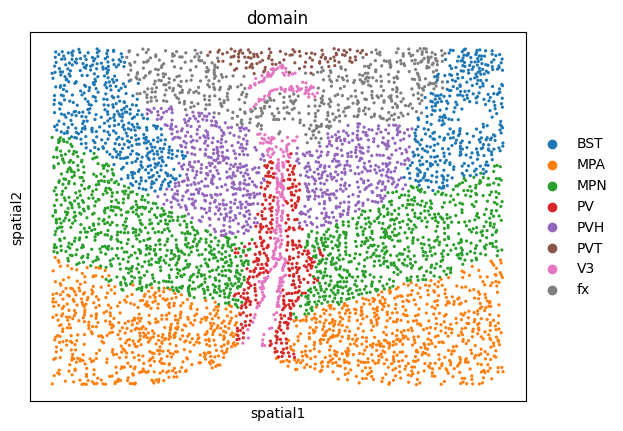

Sample: MERFISH_small2
AnnData object with n_obs × n_vars = 5557 × 155
    obs: 'cell_class', 'neuron_class', 'domain', 'Region'
    uns: 'domain_colors'
    obsm: 'spatial'


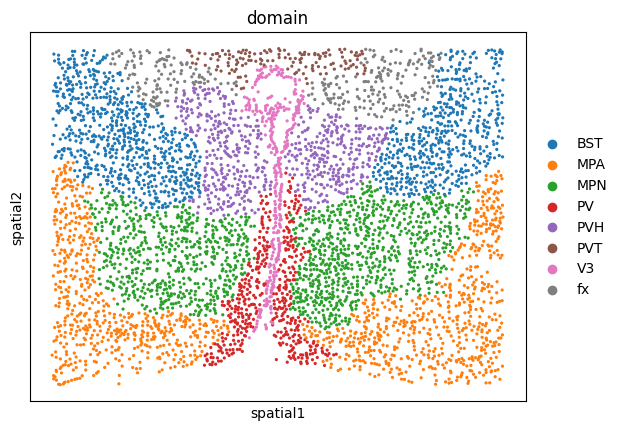

Sample: MERFISH_small3
AnnData object with n_obs × n_vars = 5926 × 155
    obs: 'cell_class', 'neuron_class', 'domain', 'Region'
    uns: 'domain_colors'
    obsm: 'spatial'


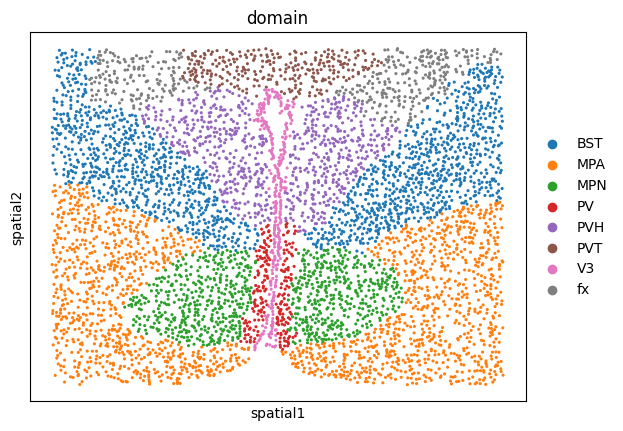

Sample: MERFISH_small4
AnnData object with n_obs × n_vars = 5803 × 155
    obs: 'cell_class', 'neuron_class', 'domain', 'Region'
    uns: 'domain_colors'
    obsm: 'spatial'


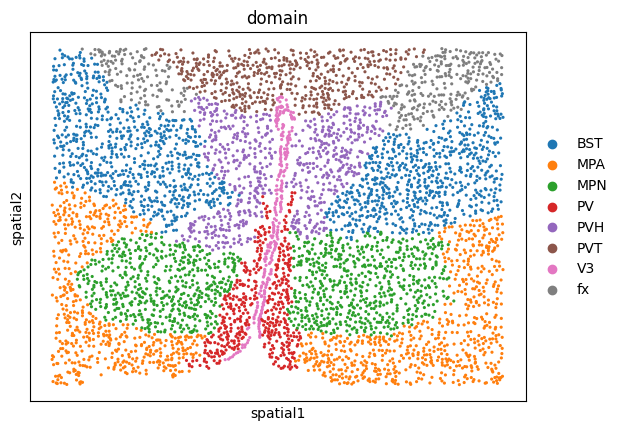

Sample: MERFISH_small5
AnnData object with n_obs × n_vars = 5543 × 155
    obs: 'cell_class', 'neuron_class', 'domain', 'Region'
    uns: 'domain_colors'
    obsm: 'spatial'


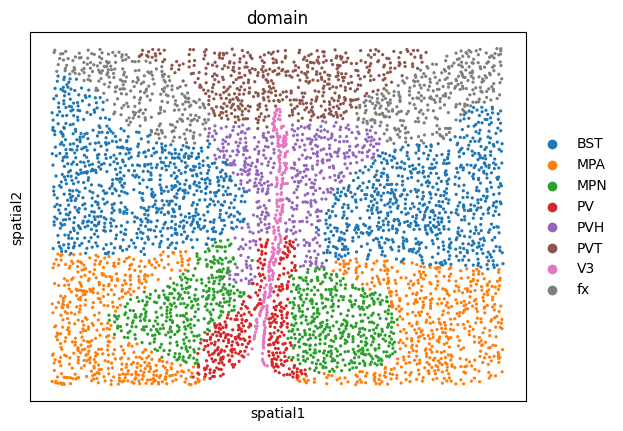

Sample: STARmap1
AnnData object with n_obs × n_vars = 1207 × 1020
    obs: 'Total_counts', 'X', 'Y', 'label', 'region', 'Region'
    uns: 'label_colors'
    obsm: 'spatial'


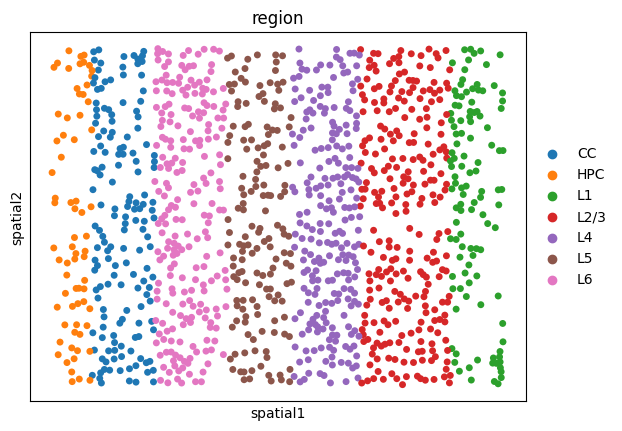

Sample: STARmap2
AnnData object with n_obs × n_vars = 1049 × 166
    obs: 'ct', 'region', 'Region'
    uns: 'ct_colors', 'region_colors'
    obsm: 'spatial'


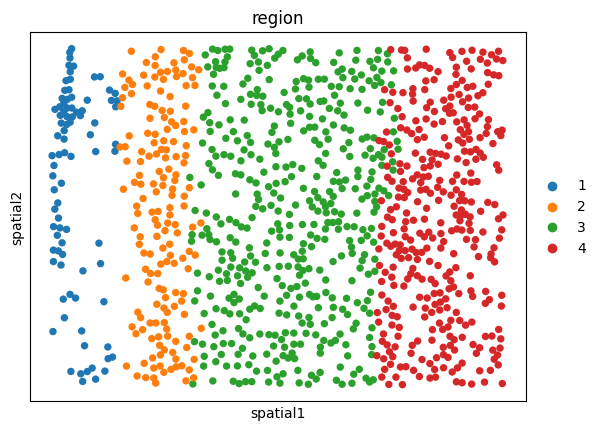

Sample: STARmap3
AnnData object with n_obs × n_vars = 1053 × 166
    obs: 'ct', 'region', 'Region'
    uns: 'ct_colors', 'region_colors'
    obsm: 'spatial'


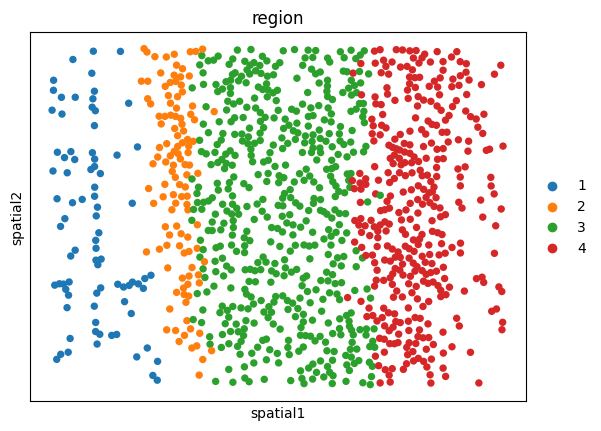

Sample: STARmap4
AnnData object with n_obs × n_vars = 1088 × 166
    obs: 'ct', 'region', 'Region'
    uns: 'ct_colors', 'region_colors'
    obsm: 'spatial'


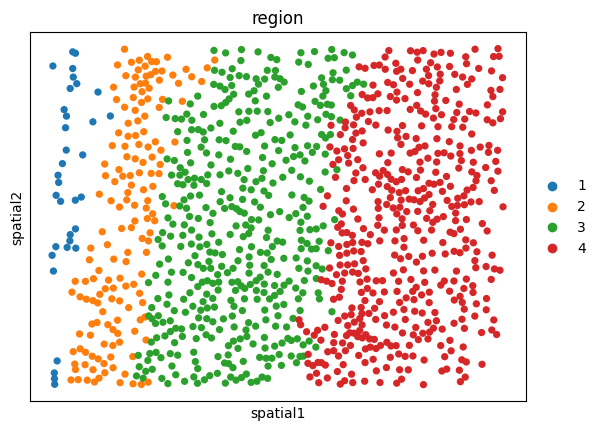

Sample: BaristaSeq1
AnnData object with n_obs × n_vars = 1525 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer', 'Region'
    uns: 'layer_colors'
    obsm: 'spatial'


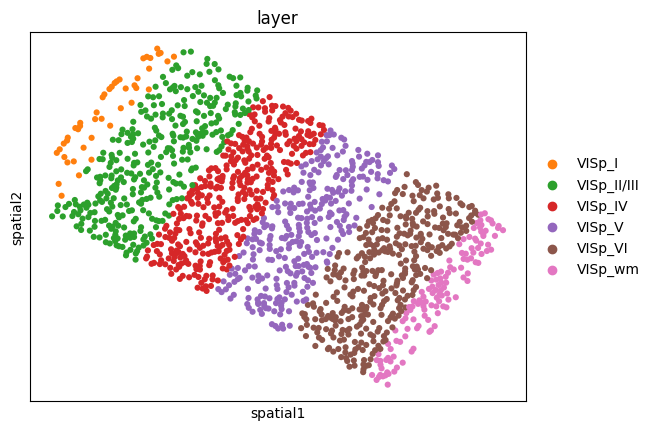

Sample: BaristaSeq2
AnnData object with n_obs × n_vars = 2042 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer', 'Region'
    uns: 'layer_colors'
    obsm: 'spatial'


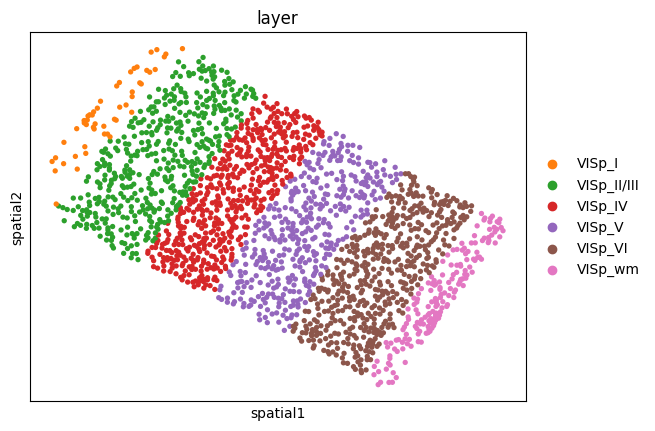

Sample: BaristaSeq3
AnnData object with n_obs × n_vars = 1690 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer', 'Region'
    uns: 'layer_colors'
    obsm: 'spatial'


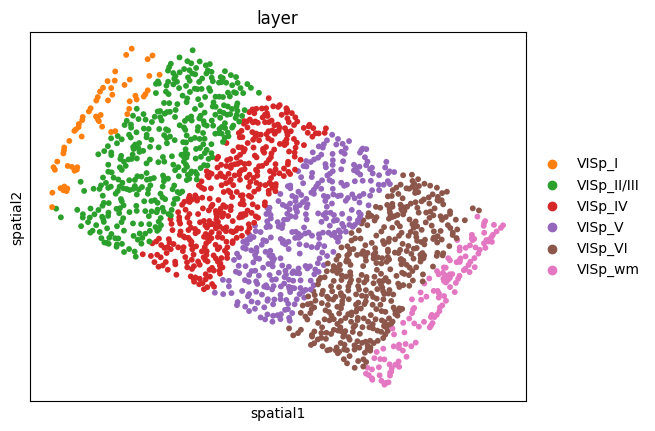

In [6]:
for sample_name, adata in raw_samples.items():
    print_sample(sample_name, adata)
    # sc.pl.embedding(adata, basis="spatial", color="domain")
    # sc.pl.embedding(adata, basis="spatial", color="region")
    # sc.pl.embedding(adata, basis="spatial", color="layer")
    # sc.pl.embedding(adata, basis="spatial", color="cell_type")
    # sc.pl.embedding(adata, basis="spatial", color="cell_type_2")